In [22]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

## Configure depth and color streams

In [52]:
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

In [53]:
# Start streaming
pipeline.start(config)


for int in range(10):
    # Wait for a coherent pair of frames: depth and color
    frames = pipeline.wait_for_frames()

    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

# Apply colormap on depth image (image must be converted to 8-bit per pixel first)
#depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

# Stack both images horizontally
#images = np.hstack((color_image, depth_image))


pipeline.stop()

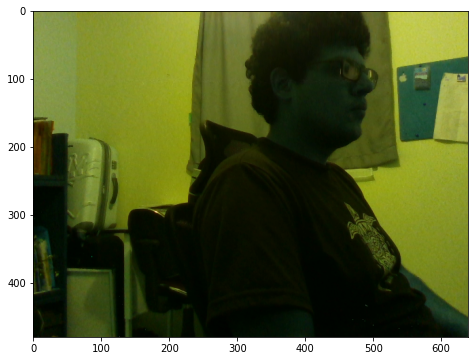

In [54]:
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color_image)

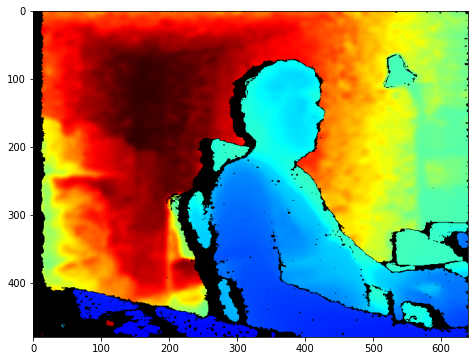

In [58]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)